In [10]:
import pandas as pd 

import matplotlib.pyplot as plt
# we use xgboost gradient boosting decsion trees model for this experiment 
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

import xgboost as xgb

import scikitplot as skplt

In [11]:
df= pd.read_csv('./data/consensus_dataset.csv', index_col=0)
df

,ad,consensus
0,we are fighting against a 1 million smear camp...,1
1,big thanks to our freenewyork partners and th...,0
2,we need your help to hit our fundraising goal ...,1
3,should sacramento stop loyalty programs for ho...,0
4,urgent we just launched ads against mitch mcco...,1
...,...,...
13271,let’s declare war on israel from the title of ...,1
13272,some legislators tell us “not in my backyard” ...,1
13273,youre invited to a live debate on question ho...,0
13274,no one should be left behind when it comes to ...,0


In [12]:
X_train, X_test, y_train, y_test= train_test_split( df['ad'], df['consensus'], test_size =0.2)

In [13]:
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_tf, y_train)

accuracy:   0.995
              precision    recall  f1-score   support

no consensus       0.99      1.00      1.00      1370
   consensus       1.00      0.99      1.00      1286

    accuracy                           1.00      2656
   macro avg       1.00      1.00      1.00      2656
weighted avg       1.00      1.00      1.00      2656

confusion matrix:
[[1368    2]
 [  10 1276]]



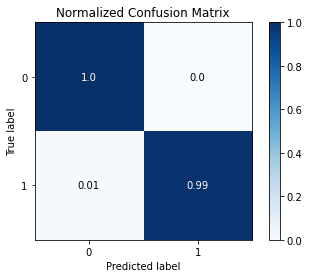

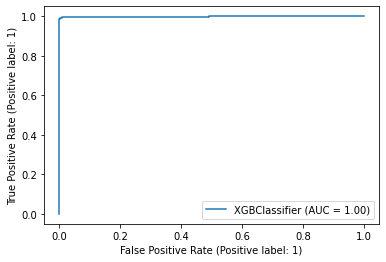

In [15]:
# predict the labels on validation dataset
predictions = xgb_clf.predict(X_test_tf)

# model performance
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['no consensus', 'consensus']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()

skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(xgb_clf, X_test_tf, y_test)

In [17]:
df_val = pd.read_csv('./data/sample_consensus.csv')
df_val

,ad,consensus
0,virtually everyone knows america has a big ill...,1
1,everyone knows smoking causes cancer but did y...,1
2,virtually everyone knows america has a big ill...,1
3,everyone knows michigan auto insurance is the ...,1
4,canadians from every region have shared with m...,1
...,...,...
80,we all think that education risks becoming th...,1
81,thounds of people are supporting ukraine \r\na...,1
82,most families are helping people suffering fro...,1
83,society is supporting those left homeless and ...,1


accuracy:   0.635
              precision    recall  f1-score   support

no consensus       0.74      0.67      0.70        55
   consensus       0.49      0.57      0.52        30

    accuracy                           0.64        85
   macro avg       0.61      0.62      0.61        85
weighted avg       0.65      0.64      0.64        85

confusion matrix:
[[37 18]
 [13 17]]



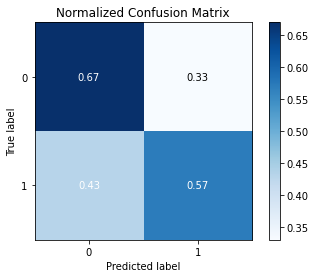

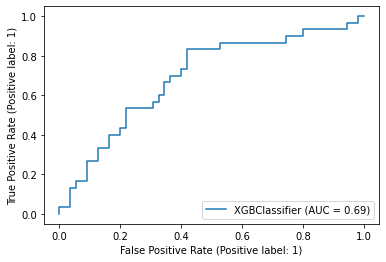

In [18]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['consensus']

y_pred = xgb_clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=['no consensus', 'consensus']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(xgb_clf, X_val, y_val)